Aluno: Giovanni Bruno Travassos de Carvalho - 11506849

Resolução da primeira questão da primeira lista de exercícios de Deep Learning

Professor: Tiago Maritan 

## Questão 2 
Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

a) a função lógica XOR

b) f(x) = sen(πx) / πx , 0 ≤ x ≤ 4  

Dica: Selecione um conjunto de amostras para cada função (onde x é a entrada e f(x) é a saída
desejada - rótulo). Essas amostras devem ser divididas em, pelo menos dois conjuntos:
treinamento e validação. Treine um perceptron de múltiplas camada para que ele aprenda a
aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de
validação.


### Primeira Etapa: Geração dos dados

In [1]:
import math
import random
import numpy as np

def generator(samples=1000):
    random.seed(234)

    X = []
    Y = []

    for i in range(samples):
        
        rand = random.uniform(0, 4)
        if(rand == 0):
            random.uniform(0, 4)
        x = rand
        y = (math.sin(math.pi * x)) / (math.pi * x)
        
        X.append(x)
        Y.append(y)
    
    X = np.array(X)
    Y = np.array(Y)
    return  X, Y

### Segunda Etapa: Rede Neural de Múltiplas Camadas 

In [52]:
# Importação das Bibliotecas:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Letra A = Função lógica XOR 

In [3]:
# Arrays de Entrada e Saída: 

entrada = [[0,0], [0,1], [1,0], [1,1]]
saida = [[0], [1], [1], [0]]

entrada = np.array(entrada)
saida = np.array(saida)

In [4]:
# Divisão entre Treino e Teste: 

X_Treino, Y_Treino, X_Teste, Y_Teste = entrada, entrada, saida, saida 

In [39]:
# Normalização: 

ss = StandardScaler()
X_Treino = ss.fit_transform(X_Treino)
X_Teste = ss.fit_transform(X_Teste)

In [43]:
# Construindo a Rede Neural: 

rede = tf.keras.models.Sequential() # Inicialização 

# Criarei 1 camada de entrada, 2 camadas ocultas, e 1 camada de saída: 
rede.add(tf.keras.layers.Dense(units=4, activation='relu', input_dim=2)) # Entrada
rede.add(tf.keras.layers.Dense(units=4, activation='relu')) # Camada oculta com 4 unidades
rede.add(tf.keras.layers.Dense(units=2, activation='relu')) # Camada oculta com 2 unidades
rede.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Camada de Saída 

In [44]:
# Compilando a Rede Neural: 
rede.compile(loss = 'mean_squared_error', optimizer = 'adam' , metrics = ['accuracy'])

In [45]:
# Treinando a rede neural: 
treino = rede.fit(X_Treino, Y_Treino, batch_size = 10, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 83ms/sample - loss: 0.2500 - acc: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 500us/sample - loss: 0.2500 - acc: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 499us/sample - loss: 0.2500 - acc: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 751us/sample - loss: 0.2500 - acc: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 749us/sample - loss: 0.2500 - acc: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 499us/sample - loss: 0.2500 - acc: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 750us/sample - loss: 0.2500 - acc: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 750us/sample - loss: 0.2500 - acc: 0.5000
Epoch 9/100
4/4 [==============================] - 0s 750us/sample - loss: 0.2500 - acc: 0.5000
Epoch 10/100
4/4 [==============================] - 0s 500us/sample - loss: 0.2500 - acc: 0.5000
Epoch 11/100
4/4 [======================

In [46]:
# Previsão: 

previsao = rede.predict(X_Teste)
previsao = (previsao > 0.5)

ValueError: Error when checking input: expected dense_30_input to have shape (2,) but got array with shape (1,)

In [47]:
# Matriz de Confusão 

confusao = confusion_matrix(Y_Teste, previsao)
print(confusao)

NameError: name 'previsao' is not defined

### Letra B = sen(πx) / πx , 0 ≤ x ≤ 4

In [48]:
# Dados de entrada: 

Xb, Yb = generator(2000)

In [49]:
Xb_Treino, Xb_Teste, Yb_Treino, Yb_Teste = train_test_split(Xb, Yb, test_size=0.3)

In [53]:
# Rede Neural: 
netw = Sequential()

netw.add(Dense(10, input_shape=(1,), activation='relu'))
netw.add(Dense(5, activation='relu'))
netw.add(Dense(1, activation='linear'))

In [54]:
# Compilando:
netw.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [55]:
# Treinando: 
treinado = netw.fit(Xb_Treino, Yb_Treino, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
 - 0s - loss: 1.2479 - mean_squared_error: 1.8342 - val_loss: 1.0811 - val_mean_squared_error: 1.4089
Epoch 2/100
 - 0s - loss: 0.9931 - mean_squared_error: 1.1800 - val_loss: 0.8394 - val_mean_squared_error: 0.8713
Epoch 3/100
 - 0s - loss: 0.7543 - mean_squared_error: 0.7078 - val_loss: 0.5965 - val_mean_squared_error: 0.4889
Epoch 4/100
 - 0s - loss: 0.4802 - mean_squared_error: 0.3189 - val_loss: 0.3269 - val_mean_squared_error: 0.1354
Epoch 5/100
 - 0s - loss: 0.2410 - mean_squared_error: 0.0918 - val_loss: 0.2316 - val_mean_squared_error: 0.0922
Epoch 6/100
 - 0s - loss: 0.2031 - mean_squared_error: 0.0802 - val_loss: 0.2077 - val_mean_squared_error: 0.0824
Epoch 7/100
 - 0s - loss: 0.1958 - mean_squared_error: 0.0781 - val_loss: 0.2046 - val_mean_squared_error: 0.0819
Epoch 8/100
 - 0s - loss: 0.1933 - mean_squared_error: 0.0763 - val_loss: 0.2011 - val_mean_squared_error: 0.0798
Epoch 9/100
 - 0s - loss: 0.1899 - mean_s

No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.


In [57]:
# Previsão: 

previsao = netw.predict(Xb_Teste)
print(f'Score: {round(r2_score(Yb_Teste, previsao)*100,2)}%')

Score: 68.61%


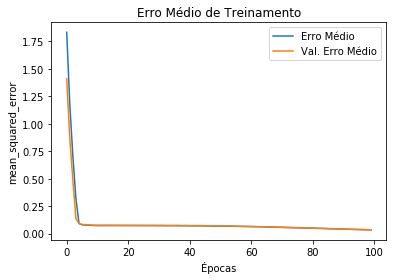

In [58]:
# Curva do Erro Médio de Treinamento com relação às Épocas:

plt.plot(treinado.history["mean_squared_error"], label="Erro Médio")
plt.plot(treinado.history["val_mean_squared_error"], label="Val. Erro Médio")
plt.title('Erro Médio de Treinamento')
plt.ylabel('mean_squared_error')
plt.xlabel('Épocas')
plt.legend()